<a href="https://colab.research.google.com/github/maimonahST/GP/blob/main/newSplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the dataset

In [68]:
import numpy as np
data_array = np.load('/content/drive/MyDrive/GP/GP-Data/data_array.npy')
label_array = np.load('/content/drive/MyDrive/GP/GP-Data/label_array.npy')
group_array = np.load('/content/drive/MyDrive/GP/GP-Data/group_array.npy')


print(data_array.shape,label_array.shape,group_array.shape)

(7150, 1250, 33) (7150,) (7150,)


# Prepare the data for traning

In [69]:
# convert the problem from multiclass classification to binary classification
# make haemorrhage and schaemia classes as one
label_array = label_array.astype('int')
label_array[label_array==0] = 1
label_array[label_array==2] = 0

In [40]:
# prompt: remove all 0 in label_array and corsponding in data_array

index = []
for i in range(len(label_array)):
  if label_array[i] == 0:
    index.append(i)

data_array = np.delete(data_array, index, axis=0)
label_array = np.delete(label_array, index)
group_array = np.delete(group_array, index)



In [41]:
np.unique(label_array)

array([1, 2])

In [42]:
label_array = label_array.astype('int')
label_array[label_array==2] = 0

In [70]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import StandardScaler
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)

## Split the data into Training ,Testing and Validation

In [71]:
# Split data_array into train and validate
train_groups = []
for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
    train_features, train_label = data_array[train_index],label_array[train_index]
    X_test, y_test =data_array[test_index],label_array[test_index]
    train_groups = group_array[train_index]

    scaler=StandardScaler3D()
    train_features=scaler.fit_transform(train_features)
    val_features=scaler.transform(X_test)

    print(f"group={np.unique(group_array[train_index])}")
    print(f"group={np.unique(group_array[test_index])}")
    break



In [72]:
# Split train_features into train and test
for train_index, val_index in gkf.split(train_features, train_label, groups= train_groups):
    X_train, y_train =train_features[train_index],train_label[train_index]
    X_val, y_val =train_features[val_index],train_label[val_index]

    # print(f"group={np.unique(group_array[train_index])}")
    # print(f"group={np.unique(group_array[val_index])}")

    break

In [78]:
# prompt: count 0 in  y_train

print((y_train == 0).sum())
print((y_test == 0).sum())
print((y_val == 0).sum())


1922
435
439


In [79]:
print((y_train == 1).sum())
print((y_test == 1).sum())
print((y_val == 1).sum())

2806
948
600


In [45]:
# data spliting percentage
train_p = train_features.shape[0]/data_array.shape[0]
test_p = X_test.shape[0]/data_array.shape[0]
# val_p = X_val.shape[0]/data_array.shape[0]

# print(f'train_p: {train_p}, test_p: {test_p}, val_p: {val_p}')
print(f'train_p: {train_p}, test_p: {test_p}')

# print("total: ",train_p + test_p + val_p)
print("total: ",train_p + test_p )

train_p: 0.8169449598021027, test_p: 0.18305504019789734
total:  1.0


In [ ]:
# prompt: Save X_train, y_train, X_test, y_test

# np.save('/content/drive/MyDrive/GP/Final Data/X_train.npy', X_train)
# np.save('/content/drive/MyDrive/GP/Final Data/y_train.npy', y_train)
# np.save('/content/drive/MyDrive/GP/Final Data/X_test.npy', X_test)
# np.save('/content/drive/MyDrive/GP/Final Data/y_test.npy', y_test)
# np.save('/content/drive/MyDrive/GP/Final Data/X_val.npy', X_val)
# np.save('/content/drive/MyDrive/GP/Final Data/y_val.npy', y_val)


NameError: name 'X_train' is not defined

# Load the pretrained models


In [46]:
# Assuming X_train is image data with shape (num_samples, height, width, channels)
x, y , z  = X_train.shape
X_train_reshaped = X_train.reshape((x, y * z))


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
X_train_reshaped.shape


(4728, 41250)

In [63]:
X_train = train_features
y_train = train_label

In [25]:
X_train.shape

(5302, 41250)

In [51]:
X_train = train_features.reshape(train_features.shape[0], -1)
# X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = train_label.reshape(train_features.shape[0], -1)
# y_val = y_val.reshape(y_val.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

In [52]:
# prompt: do feature selection for X_train

from sklearn.feature_selection import SelectKBest, f_classif

k = 10  # number of features to select
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


# Print the selected features
print(X_train_selected.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(3963, 10)


In [53]:
X_train.shape

(3963, 41250)

# ML

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Build and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train_selected, y_train)

# # Predictions on the validation set
# rf_val_predictions = rf_classifier.predict(X_val)
# rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
# print("Random Forest Validation Accuracy:", rf_val_accuracy)
# print("Classification Report (Validation):\n", classification_report(y_val, rf_val_predictions))

# Predictions on the test set
rf_test_predictions = rf_classifier.predict(X_test_selected)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("Classification Report (Test):\n", classification_report(y_test, rf_test_predictions))

<ipython-input-54-58ea3910edc5>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train_selected, y_train)


Random Forest Test Accuracy: 0.6531531531531531
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       580
           1       0.00      0.00      0.00       308

    accuracy                           0.65       888
   macro avg       0.33      0.50      0.40       888
weighted avg       0.43      0.65      0.52       888



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# prompt: write several ML models

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Define the list of models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier())
]

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=models)

# Train the voting classifier on the training data
voting_classifier.fit(X_train_selected, y_train)

# Evaluate the voting classifier on the test data
voting_test_predictions = voting_classifier.predict(X_test_selected)
voting_test_accuracy = accuracy_score(y_test, voting_test_predictions)
print("voting Test Accuracy:", voting_test_accuracy)
print("Classification Report (Test):\n", classification_report(y_test, voting_test_predictions))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

KeyboardInterrupt: 

# DL

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
from tensorflow.keras.layers import Input, Conv1D, concatenate, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def block(input):
    conv1 = Conv1D(32, 2, strides=2, activation='relu', padding="same")(input)
    conv2 = Conv1D(32, 4, strides=2, activation='relu', padding="causal")(input)
    conv3 = Conv1D(32, 8, strides=2, activation='relu', padding="causal")(input)
    x = concatenate([conv1, conv2, conv3], axis=2)
    return x

# Define the input layer with a shape of (1250, 33)
input_layer = Input(shape=(1250, 33))

# Create the first block
block1 = block(input_layer)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

cnn_out1 = Conv1D(32, 3, activation='relu', padding='same')(block3)
cnn_out2 = Conv1D(32, 3, activation='relu', padding='same')(cnn_out1)
cnn_out3 = MaxPooling1D(pool_size=2)(cnn_out2)
cnn_out4 = Flatten()(cnn_out3)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(cnn_out4)

# Define the model with 'input_layer' as the input and 'predictions' as the output
model = Model(inputs=input_layer, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using training features and labels
hist = model.fit(X_train, y_train, epochs=50, batch_size=132, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/50
36/36 [==============================] - 12s 263ms/step - loss: 0.6905 - accuracy: 0.5761 - val_loss: 0.6896 - val_accuracy: 0.5582
Epoch 2/50
36/36 [==============================] - 9s 251ms/step - loss: 0.6696 - accuracy: 0.5964 - val_loss: 0.6923 - val_accuracy: 0.5746
Epoch 3/50
36/36 [==============================] - 9s 248ms/step - loss: 0.6541 - accuracy: 0.6172 - val_loss: 0.6964 - val_accuracy: 0.5765
Epoch 4/50
36/36 [==============================] - 8s 235ms/step - loss: 0.6366 - accuracy: 0.6366 - val_loss: 0.6910 - val_accuracy: 0.5746
Epoch 5/50
36/36 [==============================] - 9s 246ms/step - loss: 0.6217 - accuracy: 0.6485 - val_loss: 0.6850 - val_accuracy: 0.5688
Epoch 6/50
36/36 [==============================] - 9s 256ms/step - loss: 0.5985 - accuracy: 0.6880 - val_loss: 0.6819 - val_accuracy: 0.5813
Epoch 7/50
36/36 [==============================] - 9s 243ms/step - loss: 0.5735 - accuracy: 0.7242 - val_loss: 0.6728 - val_accuracy: 0.5861
Epoch

In [75]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predict on test data
y_pred = hist.model.predict(X_test)

# Convert probabilities to binary predictions
#y_pred_binary = [int(round(p[0])) for p in y_pred]


#y_pred = hist.model.predict(test_features)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision, and F1-score
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1_score = f1_score(y_test, y_pred_binary)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1_score)

44/44 [==============================] - 1s 21ms/step
Accuracy: 0.660882140274765
Recall: 0.7679324894514767
Precision: 0.7451381780962129
F1-score: 0.7563636363636363


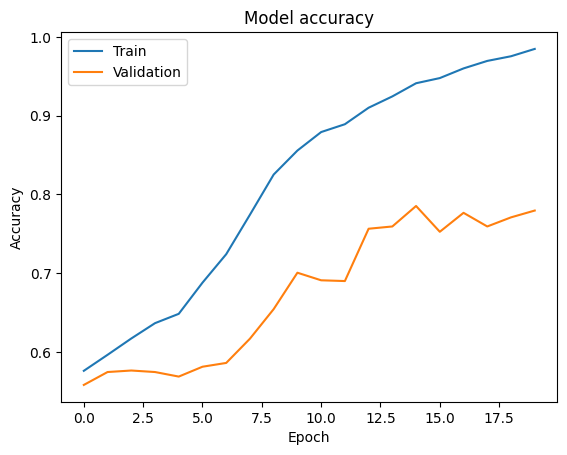

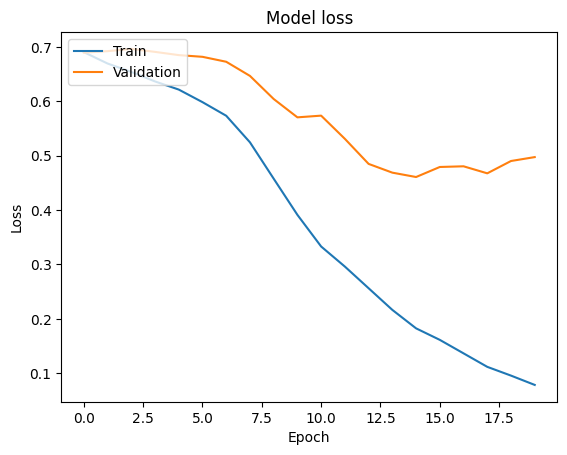

In [76]:
# plot model accuracy and loss of training and validation

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Average Confusion Matrix:
44/44 [==============================] - 1s 23ms/step


<Figure size 800x600 with 0 Axes>

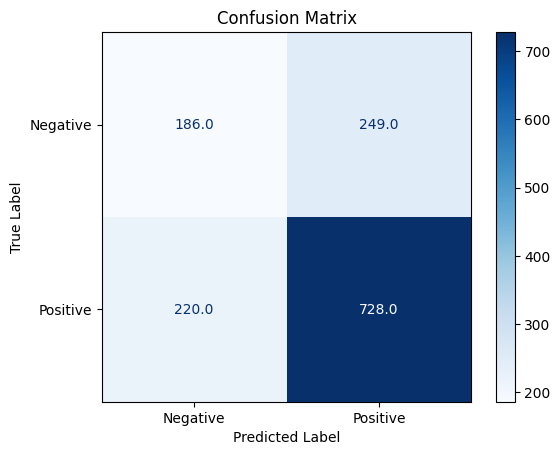

              precision    recall  f1-score   support

           0       0.46      0.43      0.44       435
           1       0.75      0.77      0.76       948

    accuracy                           0.66      1383
   macro avg       0.60      0.60      0.60      1383
weighted avg       0.65      0.66      0.66      1383



In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

print("Average Confusion Matrix:")

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test.ravel(), y_pred.ravel())

# Print the report
print(report)